In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-academic-stress-level/academic Stress level - maintainance 1.csv


In [2]:
#import all important dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [4]:
#Include file path and check data for EDA

In [5]:
df=pd.read_csv("/kaggle/input/student-academic-stress-level/academic Stress level - maintainance 1.csv")
print(df.head())

             Timestamp Your Academic Stage  Peer pressure  \
0  24/07/2025 22:05:39       undergraduate              4   
1  24/07/2025 22:05:52       undergraduate              3   
2  24/07/2025 22:06:39       undergraduate              1   
3  24/07/2025 22:06:45       undergraduate              3   
4  24/07/2025 22:08:06       undergraduate              3   

   Academic pressure from your home Study Environment  \
0                                 5             Noisy   
1                                 4          Peaceful   
2                                 1          Peaceful   
3                                 2          Peaceful   
4                                 3          Peaceful   

          What coping strategy you use as a student?  \
0  Analyze the situation and handle it with intel...   
1  Analyze the situation and handle it with intel...   
2                   Social support (friends, family)   
3  Analyze the situation and handle it with intel...   
4  Analyze

In [6]:
#basic EDA

In [7]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

Timestamp                                                              0
Your Academic Stage                                                    0
Peer pressure                                                          0
Academic pressure from your home                                       0
Study Environment                                                      1
What coping strategy you use as a student?                             0
Do you have any bad habits like smoking, drinking on a daily basis?    0
What would you rate the academic  competition in your student life     0
Rate your academic stress index                                        0
dtype: int64

In [8]:
#modifying datasets

In [9]:
df = df.drop(columns=['Timestamp'])

df.columns = [
    'academic_stage',
    'peer_pressure',
    'home_pressure',
    'study_environment',
    'coping_strategy',
    'bad_habits',
    'competition_level',
    'stress_index'
]


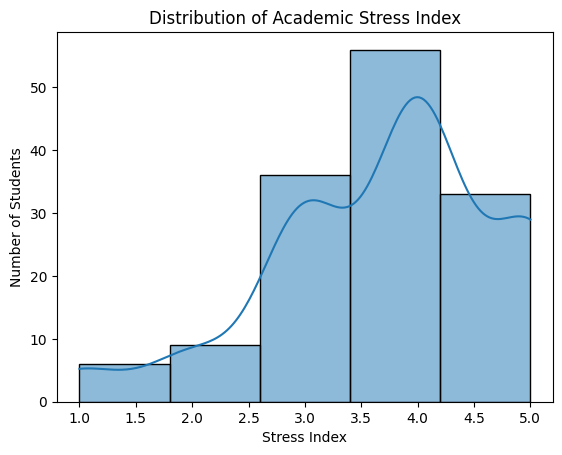

In [10]:
sns.histplot(df['stress_index'], bins=5, kde=True)
plt.title("Distribution of Academic Stress Index")
plt.xlabel("Stress Index")
plt.ylabel("Number of Students")
plt.show()


In [11]:
#Encoding 

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = [
    'academic_stage',
    'study_environment',
    'coping_strategy',
    'bad_habits'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [13]:
#defining X and Y

In [14]:
X = df.drop('stress_index', axis=1)
y = df['stress_index']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
#Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
#random forest model and MAE and RMSE value

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


MAE: 0.7600427059712774
RMSE: 0.8977606389221423


In [20]:
#feature importance

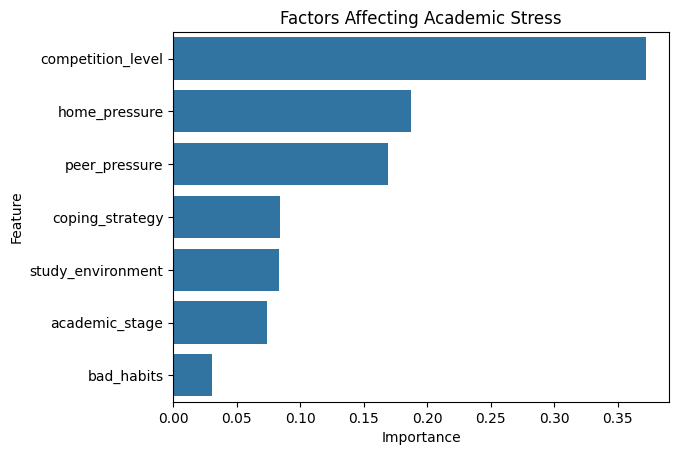

In [21]:
importances = rf.feature_importances_
features = X.columns

fi = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=fi)
plt.title("Factors Affecting Academic Stress")
plt.show()


In [22]:
#conversion to classification

In [23]:
df['stress_level'] = pd.cut(
    df['stress_index'],
    bins=[0,2,4,5],
    labels=['Low', 'Medium', 'High']
)
